In [14]:
import pandas as pd

file_path = 'obj_dump.txt'
columns = ["time", "address", "his0", "his1", "his2", "his3", "his4",
           "his5", "his6", "his7", "his8", "his9"]
#    "his10", "his11", "his12", "his13", "his14", "his15", "his16", "his17", "his18", "his19"]
# columns = ["time", "address"]
df = pd.read_csv(file_path, sep="\t", header=0, names=columns)
# duplicated_rows = df.duplicated(subset=['address'], keep=False)
# duplicated_df = df[duplicated_rows]
# print((duplicated_df))

# unique_rows_mask = ~df.duplicated(subset=['address'], keep=False)
# unique_rows = df[unique_rows_mask]
# print(unique_rows)
df['address'] = df['address'].astype(str)
df = df[~df['address'].str.startswith('938')]
df['address'] = df['address'].astype(int)

df = df.sort_values(by=['time', 'address'], ascending=True)

In [15]:
# Overwrite the original file with the sorted DataFrame
df.to_csv(file_path, sep="\t", index=False, header=0)

In [16]:
print(df.dtypes)

time       float64
address      int64
his0         int64
his1         int64
his2         int64
his3         int64
his4         int64
his5         int64
his6         int64
his7         int64
his8         int64
his9         int64
dtype: object


In [69]:
groups = df.groupby('time')

# Step 4: Create tuples for each group
result_tuples = [(group[1].iloc[0, 1], group[1].iloc[-1, 1])
                 for group in groups]

# Print the result or perform further operations
print(result_tuples)

[(140737340522928, 140737349942992), (140736945406016, 140737349942992), (140736577962048, 140737349942992), (140736171409472, 140737349942992), (140735727157392, 140737349942992), (140735723995184, 140737349942992), (140735637995584, 140737349942992), (140735623315520, 140737349942992), (140735600246848, 140737349942992), (140735587101616, 140737349942992), (140735586648128, 140737349942992), (140735586648128, 140737349942992), (140735586648128, 140737349942992), (140735586648128, 140737349942992), (140735586648128, 140737349942992), (140735586648128, 140737349942992), (140735586648128, 140737349942992), (140735586648128, 140737349942992)]


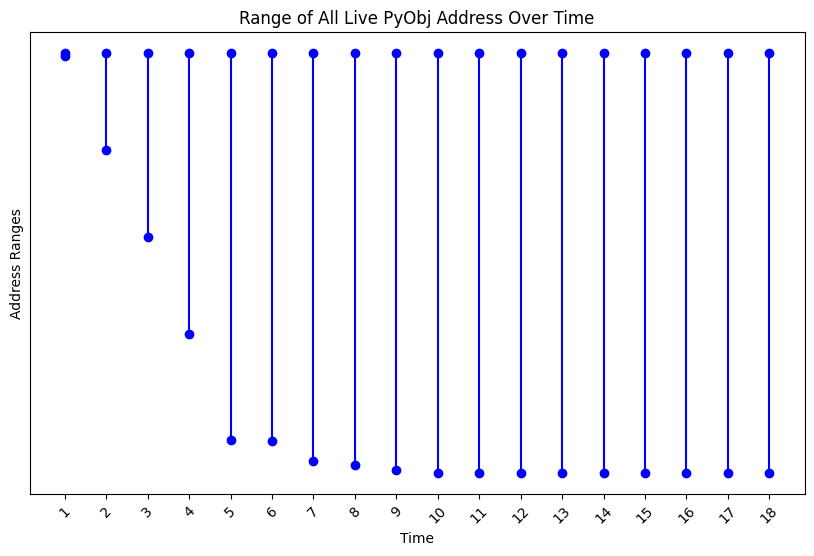

In [54]:
import matplotlib.pyplot as plt

# Assuming 'result_tuples' contains your generated tuples
# And 'group_labels' contains the unique values from the first column that correspond to each tuple
group_labels = [group[0] for group in groups]  # Extract timestamps
# Extract minimum values from tuples
min_values = [tup[0] for tup in result_tuples]
# Extract maximum values from tuples
max_values = [tup[1] for tup in result_tuples]

# Plotting
plt.figure(figsize=(10, 6))

# Plot each group's min and max values. Adjust the plotting method as needed.
for i, (start, end) in enumerate(result_tuples):
    plt.plot([i, i], [start, end], marker='o',
             linestyle='-', color='b')  # Vertical line from min to max
    # plt.text(i, min_values[i], f'{min_values[i]}',
    #          ha='center', va='bottom')  # Annotate min value
    # plt.text(i, max_values[i], f'{max_values[i]}',
    #          ha='center', va='bottom')  # Annotate max value

plt.yticks([])
plt.xticks(range(len(group_labels)), group_labels,
           rotation=45)  # Set x-ticks to group labels
plt.xlabel('Time')
plt.ylabel('Address Ranges')
plt.title('Range of All Live PyObj Address Over Time')
# plt.tight_layout()
plt.show()

In [55]:
# show the number of dp where column 'type' equals to 'str'
for idwer, group in groups:
    # num_str = (group['type'] == 'str').sum()
    # print(num_str)
    # type_counts = group['type'].value_counts()
    # print(type_counts[:5])
    print('-----------------')
group_sizes = groups.size()
print(group_sizes)
# Converting the Series to a dictionary
# type_counts_dict = type_counts.to_dict()

# # Plotting the distribution
# plt.figure(figsize=(8, 6))
# plt.bar(type_counts_dict.keys(), type_counts_dict.values(), color='skyblue')
# plt.xlabel('Type')
# plt.ylabel('Frequency')
# plt.title('Distribution of Type Occurrences')
# plt.xticks(rotation=45)
# plt.show()
# break

-----------------
-----------------
-----------------
-----------------
-----------------
-----------------
-----------------
-----------------
-----------------
-----------------
-----------------
-----------------
-----------------
-----------------
-----------------
-----------------
-----------------
-----------------
time
1       10832
2     1563039
3     2750239
4     4072401
5     5392513
6     6487633
7     7290602
8     7477762
9     7794952
10      10835
11    1585198
12    2849403
13    4073067
14    5463841
15    6628359
16    7323476
17    7477764
18    7805877
dtype: int64
